# 01 - Data Cleaning & Exploratory Data Analysis (EDA)

Follow these cells step-by-step. Run each cell in order.

In [13]:
import pandas as pd

# Replace with the actual path to your project folder
base_path = r'E:\Tutorials\Data Analyst\sales_ai_dashboard'  # UPDATE THIS PATH

clean_sales = os.path.join(base_path, 'data', 'sales_cleaned.csv')
clean_inventory = os.path.join(base_path, 'data', 'inventory_cleaned.csv')
merged = os.path.join(base_path, 'data', 'sales_inventory_merged.csv')

sales = pd.read_csv(clean_sales, parse_dates=['date_parsed'])
inventory = pd.read_csv(clean_inventory, parse_dates=['last_restock_parsed'])
merged_df = pd.read_csv(merged, parse_dates=['date_parsed','last_restock_parsed'])

print('Sales rows:', sales.shape)
print('Inventory rows:', inventory.shape)
print('Merged rows:', merged_df.shape)

Sales rows: (990, 15)
Inventory rows: (1000, 7)
Merged rows: (990, 17)


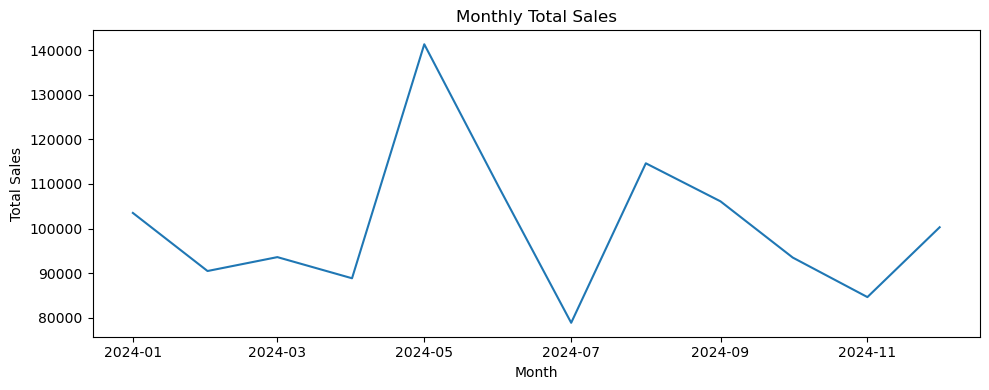

In [14]:
# Monthly total sales (handle NaT dates)
sales['month_year'] = sales['date_parsed'].dt.to_period('M').astype(str)
monthly = sales[sales['month_year'] != 'NaT'].groupby('month_year')['total_sale'].sum().reset_index()
monthly['month_year_dt'] = pd.to_datetime(monthly['month_year'].str.replace('NaT',''), errors='coerce') + pd.offsets.MonthBegin(0)
monthly = monthly.dropna(subset=['month_year_dt']).sort_values('month_year_dt')

plt.figure(figsize=(10,4))
plt.plot(monthly['month_year_dt'], monthly['total_sale'])
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


   product_id  total_sale
20       P021   42643.400
21       P022   37225.550
48       P049   35918.045
14       P015   35108.760
1        P002   34192.730
12       P013   33098.570
9        P010   32946.390
3        P004   32410.750
4        P005   31435.620
23       P024   30943.060


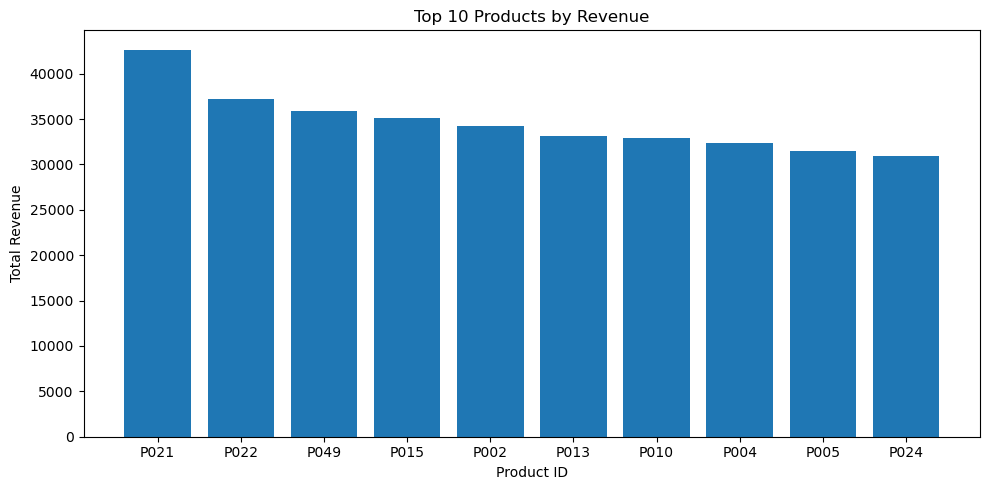

In [15]:
# Top 10 products by revenue
top_products = sales.groupby('product_id')['total_sale'].sum().reset_index().sort_values('total_sale', ascending=False).head(10)
print(top_products)

plt.figure(figsize=(10,5))
plt.bar(top_products['product_id'], top_products['total_sale'])
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


  region  total_sale
1  North  363513.655
2  South  316042.625
0   East  294405.345
3   West  236957.200


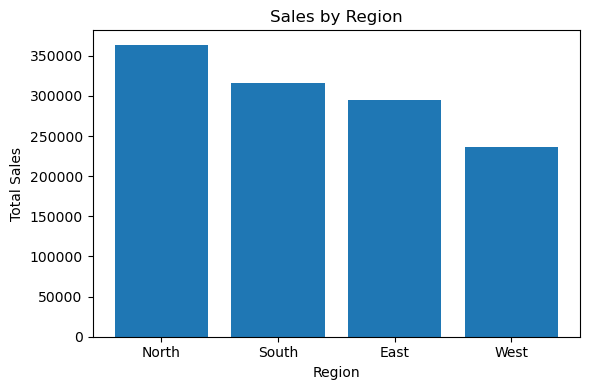

In [16]:
# Sales by region
region_sales = sales.groupby('region')['total_sale'].sum().reset_index().sort_values('total_sale', ascending=False)
print(region_sales)

plt.figure(figsize=(6,4))
plt.bar(region_sales['region'], region_sales['total_sale'])
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


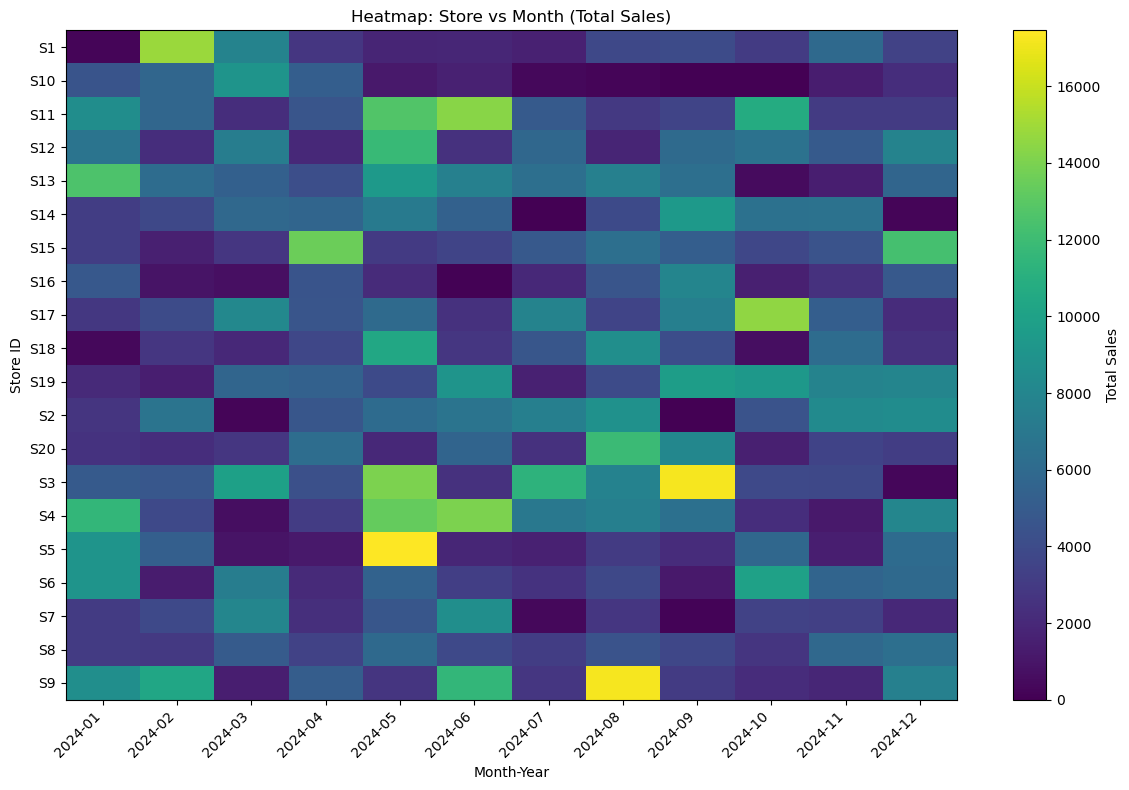

In [17]:
# Heatmap: store vs month
pivot = sales[sales['month_year'] != 'NaT'].pivot_table(index='store_id', columns='month_year', values='total_sale', aggfunc='sum', fill_value=0)
cols = pivot.columns.tolist()
if len(cols) > 12:
    cols = cols[-12:]

pivot_small = pivot[cols]

plt.figure(figsize=(12,8))
plt.imshow(pivot_small, aspect='auto')
plt.title('Heatmap: Store vs Month (Total Sales)')
plt.xlabel('Month-Year')
plt.ylabel('Store ID')
plt.xticks(ticks=range(len(cols)), labels=cols, rotation=45, ha='right')
plt.yticks(ticks=range(len(pivot_small.index)), labels=pivot_small.index)
plt.colorbar(label='Total Sales')
plt.tight_layout()
plt.show()


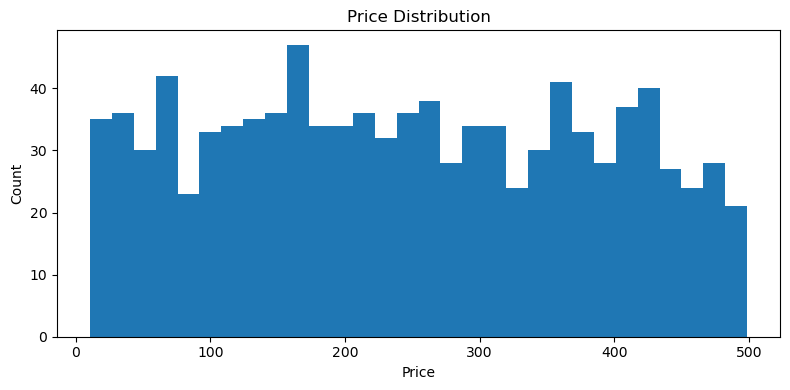

In [18]:
# Price distribution
plt.figure(figsize=(8,4))
plt.hist(sales['price'].dropna(), bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [25]:
# Save key summaries to CSV (optional)
monthly.to_csv('charts/monthly_sales_summary.csv', index=False)
region_sales.to_csv('charts/region_sales_summary.csv', index=False)
top_products.to_csv('charts/top10_products_revenue.csv', index=False)

